# Student Habits vs Academic Performance - Machine Learning Project

## Data Understanding

📌 Sumber Data:

Dataset: Student Habits vs Academic Performance

Source : https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance/

Format: CSV

Jumlah Data: 1000 baris, 16 kolom

## Import Library

In [1]:
# Library untuk manipulasi data
import pandas as pd
import numpy as np

# Library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error


Mengimpor berbagai pustaka yang diperlukan untuk analisis data, visualisasi, preprocessing, dan pemodelan regresi.

## Load Dataset

In [2]:
df = pd.read_csv("../data/student_habits_performance.csv")
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


Membaca file CSV berisi data kebiasaan belajar siswa dan performa akademik mereka. df.head() digunakan untuk menampilkan 5 baris pertama.

## Data Understanding

In [3]:
# Melihat struktur kolom dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

Memberikan informasi jumlah data, tipe data setiap kolom, dan apakah ada nilai yang hilang (null).

In [4]:
# Statistik deskriptif kolom 'parental_education_level'
df['parental_education_level'].describe()

# Mengisi missing value dengan modus (nilai terbanyak)
df['parental_education_level'] = df['parental_education_level'].fillna(df['parental_education_level'].mode()[0])

# Verifikasi tidak ada nilai kosong
df.isna().sum()


student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

Karena parental_education_level adalah kategori ordinal, nilai kosong diisi dengan modus agar tetap representatif.

## Identifikasi Kolom Kategorikal

In [5]:
# Menentukan kolom kategorikal (tipe objek)
cat_col = df.select_dtypes(include='object').columns.tolist()

# Menghapus kolom student_id karena tidak relevan
cat_col.remove('student_id')
cat_col


['gender',
 'part_time_job',
 'diet_quality',
 'parental_education_level',
 'internet_quality',
 'extracurricular_participation']

Kolom kategorikal perlu dikenali untuk dianalisis distribusinya dan untuk proses encoding nanti.

## Visualisasi Distribusi Kolom Kategorikal

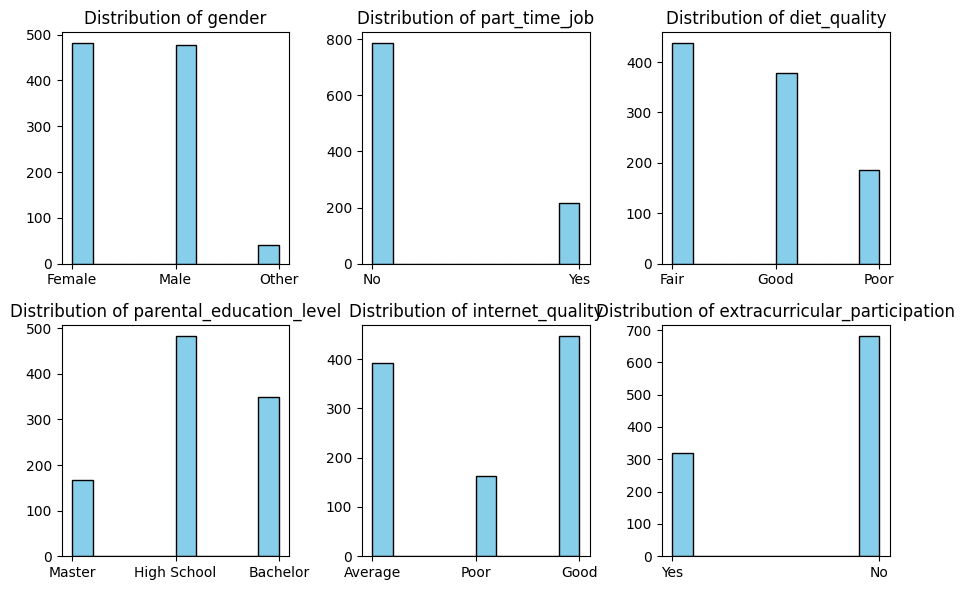

In [6]:
# Visualisasi frekuensi masing-masing kategori
plt.figure(figsize=(9, 6))
for i in range(len(cat_col)):
    plt.subplot(2, 3, i + 1)
    plt.hist(df[cat_col[i]], color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {cat_col[i]}')

plt.tight_layout()
plt.show()


Melihat sebaran kategori pada setiap kolom untuk menemukan pola yang tidak seimbang atau anomali.

## Visualisasi Distribusi Kolom Numerik

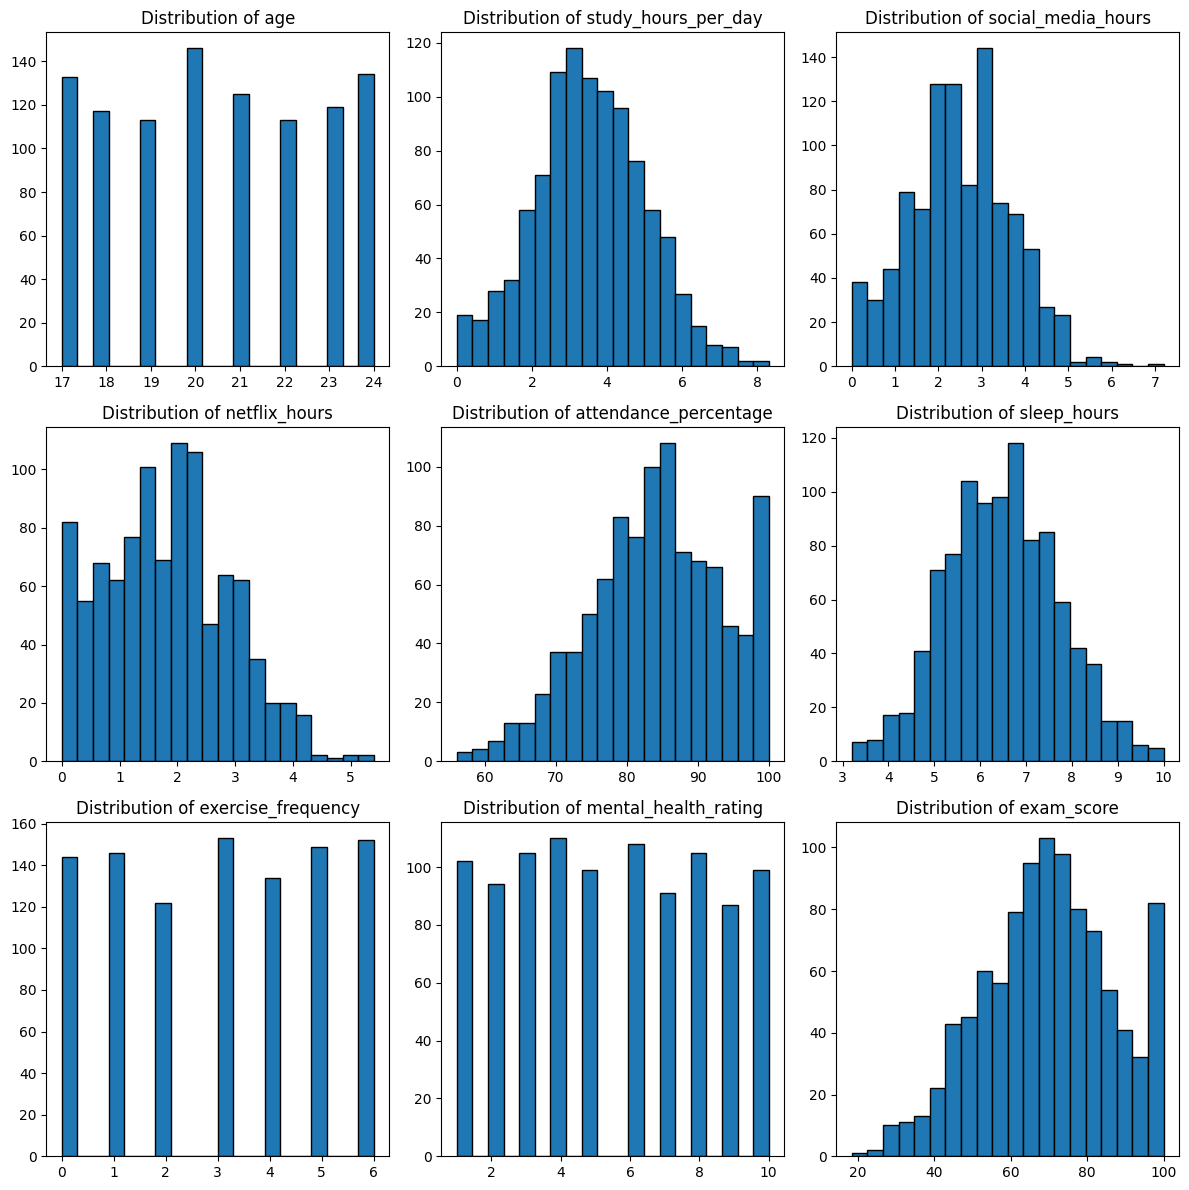

In [7]:
# Menentukan kolom numerik
num_col = df.select_dtypes(exclude='object').columns.tolist()

# Visualisasi distribusi numerik
plt.figure(figsize=(12, 12))
for i in range(len(num_col)):
    plt.subplot(3, 3, i + 1)
    plt.hist(df[num_col[i]], bins=20, edgecolor='black')
    plt.title(f'Distribution of {num_col[i]}')

plt.tight_layout()
plt.show()


Berguna untuk mengecek sebaran data, outlier, atau skewness dari setiap fitur numerik.

## Drop Kolom ID

In [8]:
# Menghapus kolom student_id karena bukan fitur prediktif
df2 = df.drop('student_id', axis=1)


Kolom ID tidak memiliki nilai prediktif dan dapat dihapus.

## Encoding Fitur Ordinal

In [9]:
# Pemetaan manual berdasarkan urutan kualitas
diet_quality = {'Poor': 0, 'Fair': 1, 'Good': 2}
parental_education_level = {'High School': 0, 'Bachelor': 1, 'Master': 2}
internet_quality = {'Poor': 0, 'Average': 1, 'Good': 2}

# Menambahkan kolom baru hasil encoding
df2['dq_e'] = df2['diet_quality'].map(diet_quality)
df2['pel_e'] = df2['parental_education_level'].map(parental_education_level)
df2['iq_e'] = df2['internet_quality'].map(internet_quality)


Kolom ordinal seperti kualitas diet atau pendidikan orang tua diubah menjadi angka agar bisa digunakan dalam model.

## One-Hot Encoding Fitur Nominal

In [10]:
# One-hot encoding untuk kolom kategorikal nominal
dummies = pd.get_dummies(df[['gender', 'part_time_job', 'extracurricular_participation']], drop_first=True)


Mengubah fitur kategorikal non-ordinal menjadi representasi numerik dengan one-hot encoding.

## Gabungkan Semua Fitur

In [11]:
# Gabungkan df2 dan hasil one-hot encoding
df3 = pd.concat([df2, dummies], axis=1)

# Drop kolom asli yang sudah di-encode
df3 = df3.drop([
    'gender',
    'part_time_job',
    'diet_quality',
    'parental_education_level',
    'internet_quality',
    'extracurricular_participation'
], axis=1)


Semua kolom kategorikal sudah dikonversi dan kolom aslinya dihapus untuk mencegah duplikasi informasi.

## Korelasi antar Fitur

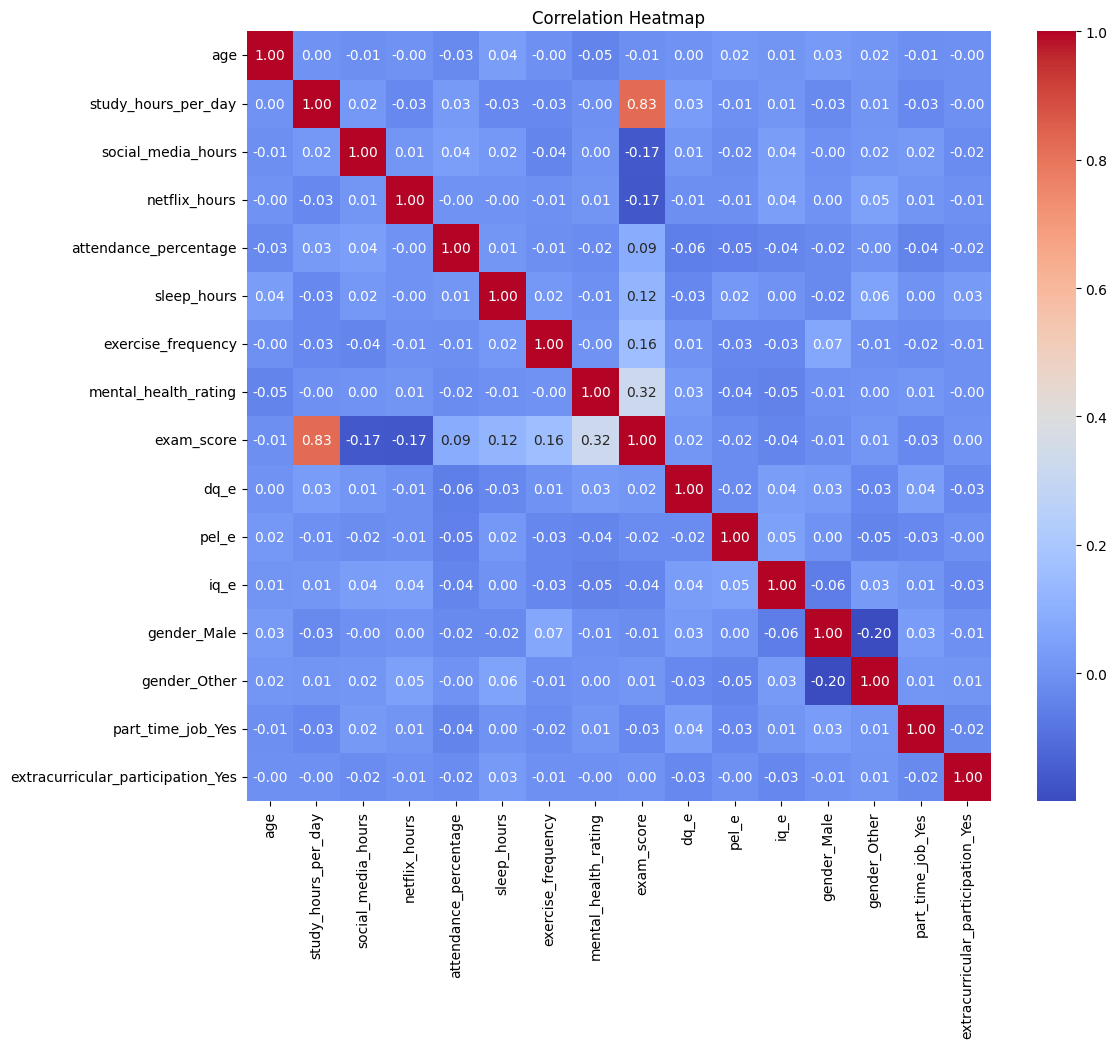

In [12]:
# Menampilkan heatmap korelasi
plt.figure(figsize=(12, 10))
corr = df3.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Korelasi membantu dalam analisis multikolinearitas dan hubungan antara fitur dengan target.

## Split Fitur & Target

In [13]:
# Pisahkan X (fitur) dan y (target)
X = df3.drop('exam_score', axis=1)
y = df3['exam_score']

# Cek bentuk data
X.shape, y.shape


((1000, 15), (1000,))

X berisi fitur, y adalah label target (exam_score) yang ingin diprediksi.

## Feature Scaling

In [14]:
# Normalisasi fitur dengan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cek bentuk setelah scaling
X_scaled.shape


(1000, 15)

Melakukan standardisasi (mean=0, std=1) pada fitur numerik untuk meningkatkan performa model, khususnya yang berbasis jarak atau gradien.

## Split Data ke Train & Test

In [15]:
# Split data menjadi data latih dan uji (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Tampilkan ukuran data latih dan uji
X_train.shape, X_test.shape


((800, 15), (200, 15))

Membagi data menjadi training dan testing set untuk evaluasi performa model yang adil.

## Modelling

In [16]:
# Inisialisasi model utama dan pembanding
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

Menggunakan dictionary agar proses pelatihan dan evaluasi setiap model bisa dilakukan dalam satu loop.

| Model             | Kelebihan                                               | Kekurangan                                     |
| ----------------- | ------------------------------------------------------- | ---------------------------------------------- |
| Linear Regression | Sederhana dan interpretatif                             | Tidak menangani hubungan non-linear            |
| Random Forest     | Robust, tahan terhadap overfitting, tidak perlu scaling | Lebih lambat, kurang interpretatif             |
| Gradient Boosting | Akurat, menangani hubungan kompleks                     | Rentan overfitting, lebih lambat               |
| **XGBoost**       | Sangat akurat, cepat, fitur boosting canggih            | Butuh tuning parameter untuk performa maksimal |


## Training dan Evaluasi Awal Semua Model

In [17]:
# Fungsi evaluasi
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)                # Training model
    y_pred = model.predict(X_test)             # Prediksi

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100

    print(f"\n{name}")
    print("-" * 40)
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE  : {mae:.2f}")
    print(f"R²   : {r2:.2f}")
    print(f"MAPE : {mape:.2f}%")

    return name, rmse, mae, r2, mape

# Evaluasi semua model
results = []
for name, model in models.items():
    result = evaluate_model(name, model, X_train, X_test, y_train, y_test)
    results.append(result)

# Ubah hasil ke DataFrame
result_df = pd.DataFrame(results, columns=['Model', 'RMSE', 'MAE', 'R2_Score', 'MAPE (%)'])

# Tampilkan hasil
print("\n📊 Hasil Evaluasi Semua Model:")
print(result_df)



Linear Regression
----------------------------------------
RMSE : 5.09
MAE  : 4.14
R²   : 0.90
MAPE : 6.83%

Random Forest
----------------------------------------
RMSE : 6.24
MAE  : 4.96
R²   : 0.85
MAPE : 8.30%

Gradient Boosting
----------------------------------------
RMSE : 5.57
MAE  : 4.66
R²   : 0.88
MAPE : 7.58%

XGBoost
----------------------------------------
RMSE : 6.36
MAE  : 5.14
R²   : 0.84
MAPE : 8.35%

📊 Hasil Evaluasi Semua Model:
               Model      RMSE       MAE  R2_Score  MAPE (%)
0  Linear Regression  5.093314  4.144451  0.898834  6.831859
1      Random Forest  6.235126  4.962410  0.848392  8.303102
2  Gradient Boosting  5.568498  4.659783  0.879077  7.576427
3            XGBoost  6.364902  5.139653  0.842015  8.350875


Penjelasan Metrik Evaluasi :

Untuk mengevaluasi performa model regresi, digunakan empat metrik utama berikut:

1. RMSE (Root Mean Squared Error)
- Mengukur rata-rata kesalahan kuadrat antara nilai prediksi dan nilai aktual, lalu diakarkan.
- Makin rendah RMSE → makin baik performa.
- Peka terhadap kesalahan besar (outlier).

2. MAE (Mean Absolute Error)
- Rata-rata dari selisih absolut antara prediksi dan nilai sebenarnya.
- Lebih tahan terhadap outlier dibanding RMSE.
- Semakin kecil nilainya → semakin baik.

3. R² Score (Koefisien Determinasi)
- Mengukur seberapa besar variasi dari target yang bisa dijelaskan oleh model.
- Nilai ideal: 1 (semua variasi dijelaskan model).
- Nilai 0 artinya model tidak lebih baik dari rata-rata.

4. MAPE (Mean Absolute Percentage Error)
- Rata-rata kesalahan prediksi dalam bentuk persentase terhadap nilai aktual.
- Makin kecil MAPE → prediksi relatif lebih akurat.
- Cocok jika ingin mengukur kesalahan secara relatif.

## Visualisasi Hasil Evaluasi

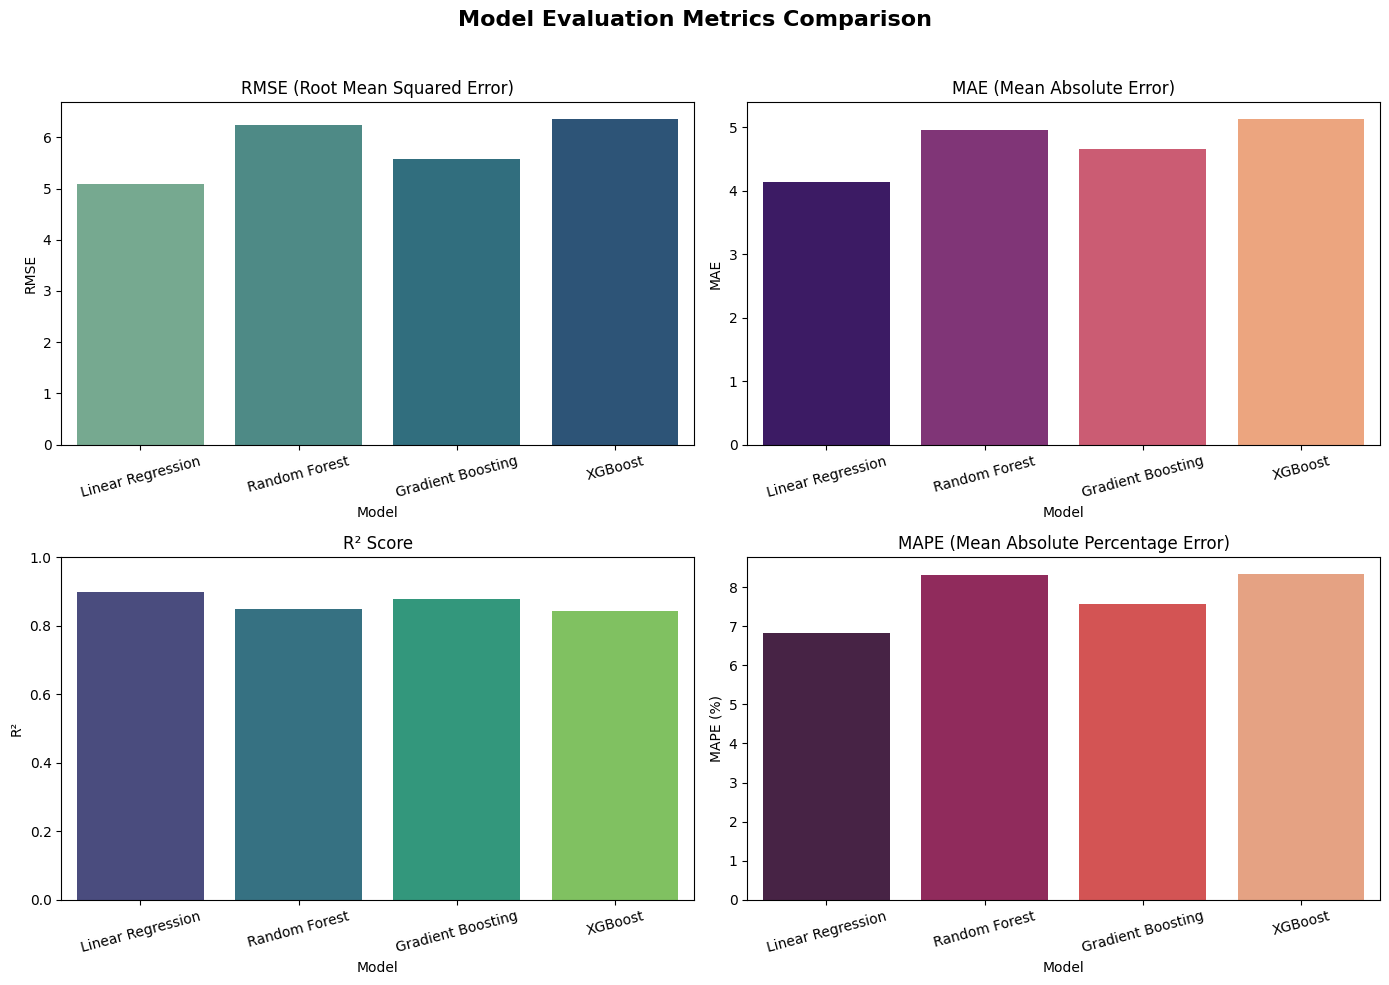

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat subplot untuk tiap metrik
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Evaluation Metrics Comparison', fontsize=16, fontweight='bold')  # Tanpa emoji

# Barplot untuk RMSE
sns.barplot(ax=axs[0, 0], data=result_df, x='Model', y='RMSE', hue='Model', palette='crest', legend=False)
axs[0, 0].set_title('RMSE (Root Mean Squared Error)')
axs[0, 0].set_ylabel('RMSE')
axs[0, 0].set_xlabel('Model')
axs[0, 0].tick_params(axis='x', rotation=15)

# Barplot untuk MAE
sns.barplot(ax=axs[0, 1], data=result_df, x='Model', y='MAE', hue='Model', palette='magma', legend=False)
axs[0, 1].set_title('MAE (Mean Absolute Error)')
axs[0, 1].set_ylabel('MAE')
axs[0, 1].set_xlabel('Model')
axs[0, 1].tick_params(axis='x', rotation=15)

# Barplot untuk R² Score
sns.barplot(ax=axs[1, 0], data=result_df, x='Model', y='R2_Score', hue='Model', palette='viridis', legend=False)
axs[1, 0].set_title('R² Score')
axs[1, 0].set_ylabel('R²')
axs[1, 0].set_xlabel('Model')
axs[1, 0].set_ylim(0, 1)
axs[1, 0].tick_params(axis='x', rotation=15)

# Barplot untuk MAPE
sns.barplot(ax=axs[1, 1], data=result_df, x='Model', y='MAPE (%)', hue='Model', palette='rocket', legend=False)
axs[1, 1].set_title('MAPE (Mean Absolute Percentage Error)')
axs[1, 1].set_ylabel('MAPE (%)')
axs[1, 1].set_xlabel('Model')
axs[1, 1].tick_params(axis='x', rotation=15)

# Tata letak rapi
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


| Model             | RMSE              | MAE               | R² Score        | MAPE (%)          |
| ----------------- | ----------------- | ----------------- | --------------- | ----------------- |
| Linear Regression | **Paling Rendah** | **Paling Rendah** | **Tertinggi**   | **Paling Rendah** |
| Gradient Boosting | Sedang            | Sedang            | Kedua tertinggi | Sedang            |
| Random Forest     | Tertinggi         | Tinggi            | Terendah        | Tertinggi         |
| XGBoost           | Hampir Tertinggi  | Tertinggi         | Rendah          | Tertinggi         |


Dari hasil visualisasi:

- Linear Regression secara konsisten memberikan performa terbaik dari semua metrik, baik dalam hal error (RMSE, MAE, MAPE) maupun akurasi (R²).

- Gradient Boosting tampil sebagai runner-up yang stabil.

- Random Forest dan XGBoost menunjukkan performa kurang baik pada dataset ini, dengan error relatif lebih tinggi dan R² lebih rendah.

## Kesimpulan

1. Model Linear Regression menunjukkan performa terbaik secara keseluruhan pada dataset ini.

2. Meskipun model seperti Random Forest dan XGBoost biasanya kuat untuk banyak kasus, pada dataset ini mereka justru tidak memberikan keunggulan berarti, kemungkinan karena:

- Dataset bersifat linier secara alami.

- Jumlah data atau fitur yang tersedia kurang mendukung kompleksitas model tersebut.